# Data Cleaning

In [1]:
import sys
print(sys.executable)


c:\Users\Admin\OneDrive\เดสก์ท็อป\mini_project\venv311\Scripts\python.exe


In [2]:
#--นำเข้าข้อมูลดิบ (Raw Data) ---
import pandas as pd
file_path = 'Current health expenditure.csv'
df = pd.read_csv(file_path)

print("1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก")
print(df.head())

1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก
                  Country Name          IncomeGroup Country Code      2000  \
0                        Aruba          High income          ABW       NaN   
1  Africa Eastern and Southern                  NaN          AFE  5.654027   
2                  Afghanistan           Low income          AFG       NaN   
3   Africa Western and Central                  NaN          AFW  3.462852   
4                       Angola  Lower middle income          AGO  1.908599   

       2001      2002      2003      2004      2005       2006  ...      2013  \
0       NaN       NaN       NaN       NaN       NaN        NaN  ...       NaN   
1  5.813231  5.442299  6.023682  6.109320  5.955198   5.972892  ...  6.161271   
2       NaN  9.443391  8.941258  9.808474  9.948289  10.622766  ...  8.805964   
3  3.486867  3.140402  4.437640  4.279378  4.132311   4.060231  ...  3.609185   
4  4.483516  3.329461  3.547973  3.967199  2.852195   2.685535  ...  2.732827   

       

In [3]:
#2. ค้นหาคอลัมน์ที่เป็นปี (เช่น '2000', '2001', ...)
#เราจะหาคอลัมน์ที่เป็นตัวเลข (ปี) อัตโนมัติ
year_cols = [col for col in df.columns if col.isdigit()]

#3. กำหนดคอลัมน์เป้าหมายที่จะเก็บไว้
#นี่คือคอลัมน์ "ทั้งหมด" ที่เราต้องการเก็บไว้
target_cols = ['Country Code', 'IncomeGroup'] + year_cols

print(f"2. คอลัมน์เป้าหมายที่จะเก็บไว้ ({len(target_cols)} คอลัมน์)")
print(target_cols)

2. คอลัมน์เป้าหมายที่จะเก็บไว้ (25 คอลัมน์)
['Country Code', 'IncomeGroup', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [4]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ (ลบคอลัมน์อื่นทิ้ง)
#เราจะเลือกเฉพาะ target_cols และใช้ .copy() เพื่อป้องกัน Warning
df_focused = df[target_cols].copy()

print("3. ข้อมูลหลังเลือกเฉพาะคอลัมน์ (ยังไม่ลบ NaN) ---")
print(df_focused.head())

3. ข้อมูลหลังเลือกเฉพาะคอลัมน์ (ยังไม่ลบ NaN) ---
  Country Code          IncomeGroup      2000      2001      2002      2003  \
0          ABW          High income       NaN       NaN       NaN       NaN   
1          AFE                  NaN  5.654027  5.813231  5.442299  6.023682   
2          AFG           Low income       NaN       NaN  9.443391  8.941258   
3          AFW                  NaN  3.462852  3.486867  3.140402  4.437640   
4          AGO  Lower middle income  1.908599  4.483516  3.329461  3.547973   

       2004      2005       2006      2007  ...      2013      2014  \
0       NaN       NaN        NaN       NaN  ...       NaN       NaN   
1  6.109320  5.955198   5.972892  5.994838  ...  6.161271  5.820881   
2  9.808474  9.948289  10.622766  9.904675  ...  8.805964  9.528878   
3  4.279378  4.132311   4.060231  3.845552  ...  3.609185  3.637259   
4  3.967199  2.852195   2.685535  2.974391  ...  2.732827  2.434129   

        2015       2016       2017       2018   

In [5]:
#ลบแถวที่มีค่าว่าง (NaN)
#.dropna() จะลบแถวใดก็ตามที่มีค่าว่าง "อย่างน้อยหนึ่งช่อง" ในแถวนั้น
rows_before = len(df_focused)
df_final = df_focused.dropna()
rows_after = len(df_final)

print(f"4. ลบแถวที่มีค่าว่าง (NaN)")
print(f"จำนวนแถว (ก่อนลบ NaN): {rows_before}")
print(f"จำนวนแถว (หลังลบ NaN): {rows_after}")
print("\n")

#ผลลัพธ์สุดท้าย
print("5. ข้อมูลที่ Clean แล้ว (Final Data)")
print(df_final.head())
print("\n")
df_final.info()

4. ลบแถวที่มีค่าว่าง (NaN)
จำนวนแถว (ก่อนลบ NaN): 266
จำนวนแถว (หลังลบ NaN): 184


5. ข้อมูลที่ Clean แล้ว (Final Data)
  Country Code          IncomeGroup      2000      2001      2002      2003  \
4          AGO  Lower middle income  1.908599  4.483516  3.329461  3.547973   
5          ALB  Upper middle income  5.944198  5.925845  5.664645  5.911408   
6          AND          High income  5.952764  5.858237  5.996212  5.547715   
8          ARE          High income  2.395045  2.484364  2.717709  2.646344   
9          ARG  Upper middle income  8.220011  8.371799  7.393312  6.894516   

       2004      2005      2006      2007  ...      2013      2014       2015  \
4  3.967199  2.852195  2.685535  2.974391  ...  2.732827  2.434129   2.605795   
5  5.893649  5.729545  5.631770  5.926091  ...  6.282863  6.434511   6.464119   
6  5.288469  5.594769  4.965300  4.923473  ...  6.799642  6.773080   6.915864   
8  2.462256  2.320211  2.325414  2.566027  ...  3.502222  3.534055   3.466094   


In [6]:
#เราจะ Melt df_final (ที่ Clean แล้ว)
print("6. กำลัง 'Melt' ข้อมูล (Wide to Long) เพื่อเตรียมพล็อตกราฟ...")
df_long = df_final.melt(
    id_vars=['Country Code', 'IncomeGroup'], #คอลัมน์ที่จะคงไว้
    var_name='Year',                      #คอลัมน์ใหม่สำหรับ "ปี"
    value_name='Expenditure (% GDP)'      #คอลัมน์ใหม่สำหรับ "ค่า"
)

#แปลง 'Year' (ที่เป็น Text) ให้เป็น 'ตัวเลข'
df_long['Year'] = pd.to_numeric(df_long['Year'])

print("ข้อมูลที่พร้อมสำหรับพล็อตกราฟ (Long Format):")
print("\n")
print(df_long.head())

6. กำลัง 'Melt' ข้อมูล (Wide to Long) เพื่อเตรียมพล็อตกราฟ...
ข้อมูลที่พร้อมสำหรับพล็อตกราฟ (Long Format):


  Country Code          IncomeGroup  Year  Expenditure (% GDP)
0          AGO  Lower middle income  2000             1.908599
1          ALB  Upper middle income  2000             5.944198
2          AND          High income  2000             5.952764
3          ARE          High income  2000             2.395045
4          ARG  Upper middle income  2000             8.220011


# DBSCAN

จุดประสงค์ในการวิเคราะห์

---- หาประเทศที่มีสัดส่วนงบประมาณด้านสุขภาพต่อ GDP (% of GDP) มากที่สุดหรือน้อยที่สุด (Outliers)

ด้วยวิธี DBSCAN (Density-Based Spatial Clustering of Applications with Noise)-----

---กราฟกระจายตามกลุ่มรายได้---


C:\Users\Admin\AppData\Local\Temp\ipykernel_25316\1287705656.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


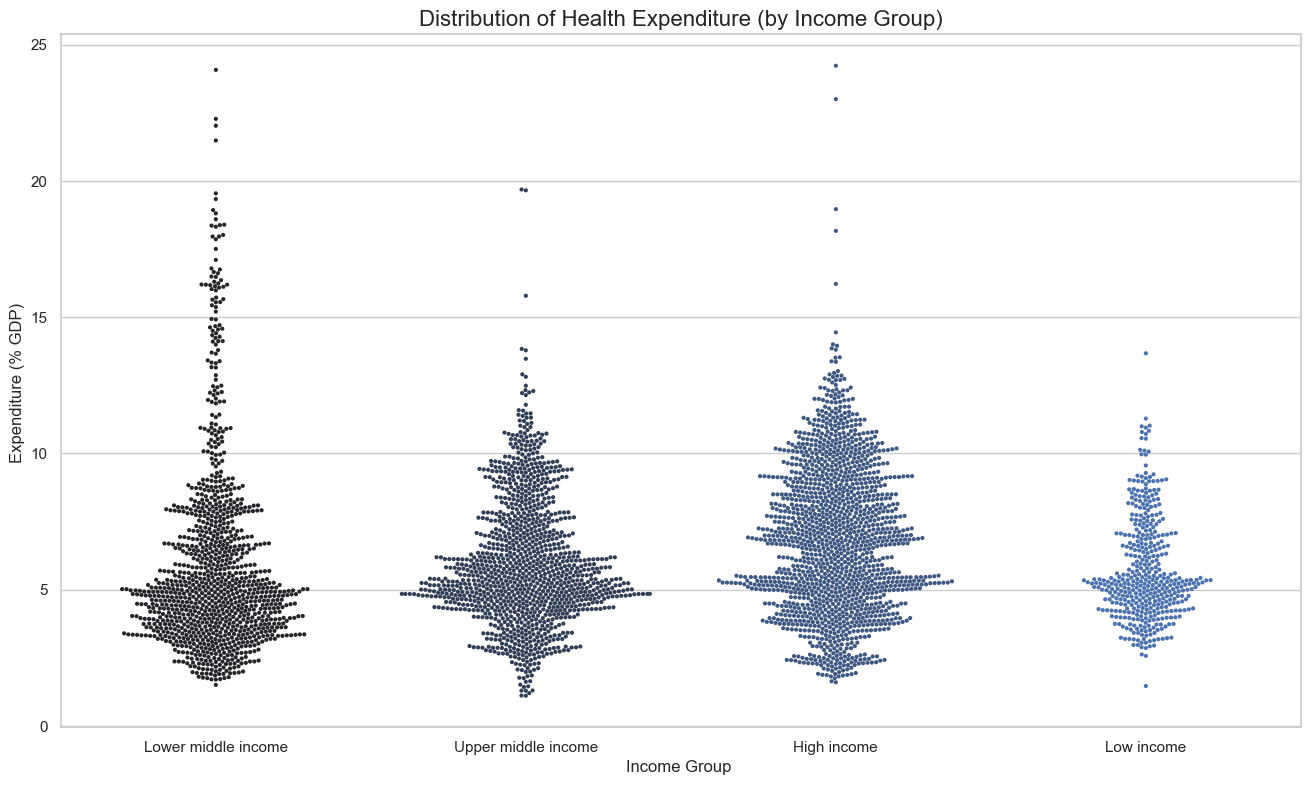

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
print("---กราฟกระจายตามกลุ่มรายได้---")

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid")

#Swarmplot (กราฟผึ้ง) จะแสดงการกระจายตัวได้ดีกว่า
#X = คลัสเตอร์ (IncomeGroup)
#Y = ค่า (Expenditure)
sns.swarmplot(
    data=df_long,
    x='IncomeGroup',
    y='Expenditure (% GDP)',
    size=3,
    palette="dark:b"
)

plt.title('Distribution of Health Expenditure (by Income Group)', fontsize=16)
plt.xlabel('Income Group ', fontsize=12)
plt.ylabel('Expenditure (% GDP) ', fontsize=12)

plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

print("---เตรียมรัน DBSCAN (แยกตามกลุ่ม)---")

#สร้างลิสต์ของกลุ่มที่เราจะวิเคราะห์
income_groups = df_long['IncomeGroup'].unique()

#สร้างลิสต์เปล่าไว้เก็บผลลัพธ์ (ตารางสรุป)
outlier_summary = []

print(f"จะทำการวิเคราะห์ใน {len(income_groups)} กลุ่ม: {income_groups}")

---เตรียมรัน DBSCAN (แยกตามกลุ่ม)---
จะทำการวิเคราะห์ใน 4 กลุ่ม: ['Lower middle income' 'Upper middle income' 'High income' 'Low income']


In [9]:
print("---กำลังรัน DBSCAN ในแต่ละกลุ่ม---")

#*****eps = รัศมีความใกล้เคียง
#*****min_samples = จำนวนเพื่อนบ้านขั้นต่ำ (ถ้าน้อยกว่านี้ ถือเป็น Outlier)
dbscan_eps = 0.5 
dbscan_min_samples = 5

for group in income_groups:
    
    #กรองข้อมูลเฉพาะกลุ่มนี้
    group_data = df_long[df_long['IncomeGroup'] == group].copy()
    
    #*****ป้องกัน Error: ถ้ากลุ่มนี้มีข้อมูลน้อยเกินไป ให้ข้าม
    if len(group_data) < dbscan_min_samples:
        print(f"\n...ข้ามกลุ่ม '{group}' (มีข้อมูลเพียง {len(group_data)} จุด)")
        outlier_summary.append({
            'IncomeGroup': group,
            'Total_Points': len(group_data),
            'Outliers_Found': 0
        })
        continue

    #เตรียมข้อมูล (1 มิติ) สำหรับการ Scaling
    features = group_data['Expenditure (% GDP)'].values.reshape(-1, 1)
    
    #Scale ข้อมูล
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    #รัน DBSCAN
    db = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
    clusters = db.fit_predict(features_scaled)
    
    #นับจำนวน Outliers (กลุ่ม -1)
    outlier_count = (clusters == -1).sum()
    
    print(f"\n...วิเคราะห์กลุ่ม: {group}")
    print(f"  -> ข้อมูลทั้งหมด: {len(group_data)} จุด | พบ Outliers: {outlier_count} จุด")
    
    #เก็บผลลัพธ์
    outlier_summary.append({
        'IncomeGroup': group,
        'Total_Points': len(group_data),
        'Outliers_Found': outlier_count
    })
    #เราใช้ .loc เพื่อป้องกัน Warning
    df_long.loc[group_data.index, 'Cluster'] = clusters

---กำลังรัน DBSCAN ในแต่ละกลุ่ม---

...วิเคราะห์กลุ่ม: Lower middle income
  -> ข้อมูลทั้งหมด: 1081 จุด | พบ Outliers: 4 จุด

...วิเคราะห์กลุ่ม: Upper middle income
  -> ข้อมูลทั้งหมด: 1196 จุด | พบ Outliers: 3 จุด

...วิเคราะห์กลุ่ม: High income
  -> ข้อมูลทั้งหมด: 1518 จุด | พบ Outliers: 5 จุด

...วิเคราะห์กลุ่ม: Low income
  -> ข้อมูลทั้งหมด: 437 จุด | พบ Outliers: 2 จุด


---พล็อตกราฟผลลัพธ์ (แสดง Outliers)---


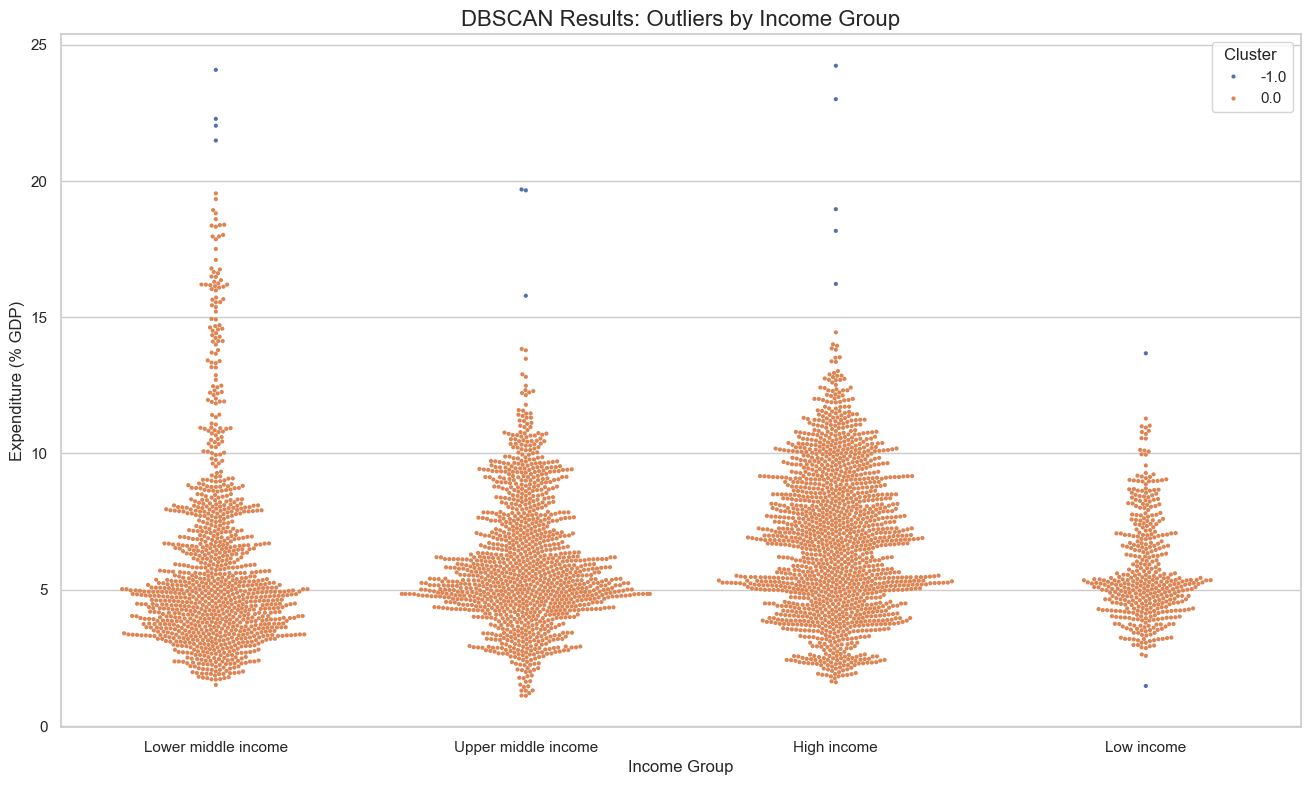

In [10]:
print("---พล็อตกราฟผลลัพธ์ (แสดง Outliers)---")

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid")

#X = IncomeGroup, Y = Expenditure
#hue = 'Cluster' (สีจะถูกแบ่งตามกลุ่มที่ DBSCAN หาเจอ)
sns.swarmplot(
    data=df_long,
    x='IncomeGroup',
    y='Expenditure (% GDP)',
    hue='Cluster', #ระบายสีตามกลุ่ม (Outliers = -1)
    palette="deep",
    size=3
)

plt.title('DBSCAN Results: Outliers by Income Group', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Expenditure (% GDP)', fontsize=12)
plt.legend(title='Cluster ')
plt.show()

In [11]:
print("---สรุปผลการค้นหา Outliers (DBSCAN)---")
print("\n")
#แปลงลิสต์ผลลัพธ์ให้เป็น DataFrame
summary_df = pd.DataFrame(outlier_summary)

#คำนวณ % Outliers
summary_df['Outlier_Percent'] = (summary_df['Outliers_Found'] / summary_df['Total_Points']) * 100

#เรียงลำดับตาม % Outlier ที่พบ
summary_df = summary_df.sort_values(by='Outlier_Percent', ascending=False)

print(summary_df.to_markdown(index=False, floatfmt=".2f"))

---สรุปผลการค้นหา Outliers (DBSCAN)---


| IncomeGroup         |   Total_Points |   Outliers_Found |   Outlier_Percent |
|:--------------------|---------------:|-----------------:|------------------:|
| Low income          |            437 |                2 |              0.46 |
| Lower middle income |           1081 |                4 |              0.37 |
| High income         |           1518 |                5 |              0.33 |
| Upper middle income |           1196 |                3 |              0.25 |


In [12]:
print("---รายละเอียด Outliers (ประเทศและค่า)---")

#กรองเอาเฉพาะแถว Outliers (-1)
outliers_df = df_long[df_long['Cluster'] == -1].copy()

#เลือกคอลัมน์ที่ต้องการแสดง
outliers_details = outliers_df[['IncomeGroup', 'Country Code', 'Year', 'Expenditure (% GDP)']]

#เรียงลำดับเพื่อให้ดูง่าย
#เรียงตามกลุ่ม, แล้วเรียงตามค่าที่ 'สูง' ที่สุด หรือ 'ต่ำ' ที่สุด
outliers_details_sorted = outliers_details.sort_values(
    by=['IncomeGroup', 'Expenditure (% GDP)'],
    ascending=[True, False] # เรียงตามกลุ่ม, แล้วเรียงตามค่าที่ 'สูง' ที่สุด
)

#พิมพ์ผลลัพธ์
if outliers_details_sorted.empty:
    print("ไม่พบ Outliers ที่ชัดเจน (ด้วยการตั้งค่า DBSCAN ปัจจุบัน)")
else:
    print("รายละเอียดของ Outliers ที่พบ (เรียงตามกลุ่มและค่าใช้จ่าย):")
    print("\n")
    #เราใช้ .to_markdown() อีกครั้งเพื่อให้เป็นตารางสวยงาม
    print(outliers_details_sorted.to_markdown(index=False, floatfmt=".2f"))

---รายละเอียด Outliers (ประเทศและค่า)---
รายละเอียดของ Outliers ที่พบ (เรียงตามกลุ่มและค่าใช้จ่าย):


| IncomeGroup         | Country Code   |   Year |   Expenditure (% GDP) |
|:--------------------|:---------------|-------:|----------------------:|
| High income         | NRU            |   2007 |                 24.23 |
| High income         | NRU            |   2008 |                 23.00 |
| High income         | NRU            |   2000 |                 18.97 |
| High income         | NRU            |   2022 |                 18.17 |
| High income         | NRU            |   2001 |                 16.22 |
| Low income          | MDA            |   2009 |                 13.68 |
| Low income          | COD            |   2000 |                  1.47 |
| Lower middle income | TUV            |   2017 |                 24.08 |
| Lower middle income | TUV            |   2000 |                 22.28 |
| Lower middle income | TUV            |   2019 |                 22.03 |
| Lower mi